In [37]:
%matplotlib inline

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
import statistics
import scipy.stats as sts
import matplotlib as mpl

In [3]:
#file to load
cityDataToLoad = 'resources/city_data.csv'
rideDataToLoad = 'resources/ride_data.csv'



In [5]:
cityDataDf = pd.read_csv(cityDataToLoad)
cityDataDf

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [7]:
rideDataDf = pd.read_csv(rideDataToLoad)
rideDataDf

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [9]:
#chekcing data types and data info
cityDataDf.dtypes
cityDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [10]:
#counting all records
cityDataDf.count()

city            120
driver_count    120
type            120
dtype: int64

In [11]:
#double check, no null values
cityDataDf.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [13]:
cityDataDf['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
urbanCount = sum(cityDataDf['type']=='Urban')
urbanCount

66

In [15]:
suburbCount = sum(cityDataDf['type']=='Suburban')
suburbCount

36

In [16]:
ruralCount = sum(cityDataDf['type']=='Rural')
ruralCount

18

In [17]:
rideDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [18]:
rideDataDf.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [20]:
pyBerDataComplete = pd.merge(rideDataDf,cityDataDf, how = 'left',on=['city','city'])
pyBerDataComplete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
urbanCitiesDf = pyBerDataComplete[pyBerDataComplete['type']=='Urban']
urbanCitiesDf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [22]:
suburbCitiesDf = pyBerDataComplete[pyBerDataComplete['type']=='Suburban']
suburbCitiesDf.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [23]:
ruralCitiesDf = pyBerDataComplete[pyBerDataComplete['type']=='Rural']
ruralCitiesDf.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [25]:
urbanRideCount = urbanCitiesDf.groupby(['city']).count()['ride_id']
urbanRideCount.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [26]:
suburbRideCount = suburbCitiesDf.groupby(['city']).count()['ride_id']
suburbRideCount.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [27]:
ruralRideCount = ruralCitiesDf.groupby(['city']).count()['ride_id']
ruralRideCount.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [44]:
urbanFareMean = urbanCitiesDf.groupby(['city']).mean()['fare']
urbanFareMean.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [46]:
suburbFareMean = suburbCitiesDf.groupby(['city']).mean()['fare']
suburbFareMean.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [47]:
ruralFareMean = ruralCitiesDf.groupby(['city']).mean()['fare']
ruralFareMean.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [33]:
urbanDriversMean = urbanCitiesDf.groupby(['city']).mean()['driver_count']
urbanDriversMean.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [34]:
suburbDriversMean = suburbCitiesDf.groupby(['city']).mean()['driver_count']
suburbDriversMean.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [35]:
ruralDriversMean = ruralCitiesDf.groupby(['city']).mean()['driver_count']
ruralDriversMean.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

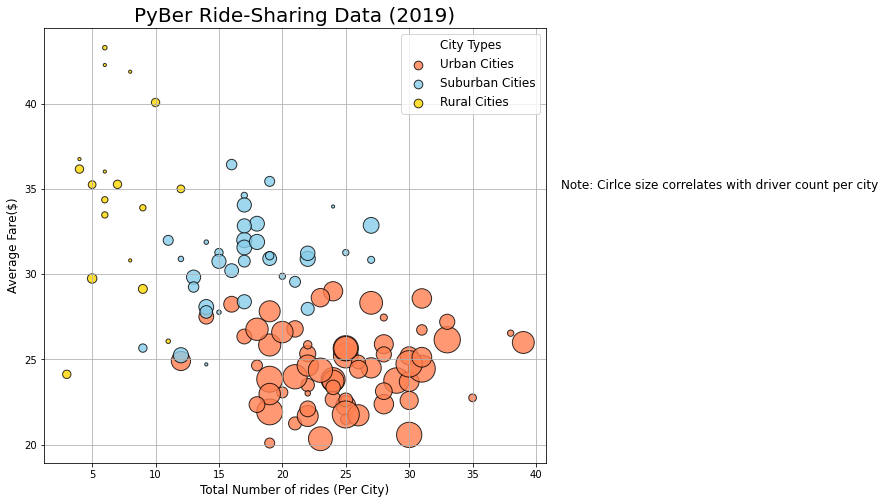

In [76]:
#Create bubble plot and save the figure in analysis folder
plt.subplots(figsize=(9,8))
plt.scatter(urbanRideCount,urbanFareMean,s=10*urbanDriversMean,color='coral',label='Urban Cities',edgecolor='black',linewidths=1,alpha=0.8)
plt.scatter(suburbRideCount, suburbFareMean,s=10*suburbDriversMean,color='skyblue',label='Suburban Cities',edgecolor='black',linewidths=1,alpha=0.8)
plt.scatter(ruralRideCount,ruralFareMean,s=10*ruralDriversMean,color='gold',label='Rural Cities',edgecolor='black',linewidths=1,alpha=0.8)
plt.title('PyBer Ride-Sharing Data (2019)', fontsize = 20)
plt.xlabel('Total Number of rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare($)', fontsize = 12)
plt.grid(True)
lgnd = plt.legend(fontsize='12',mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35, 'Note: Cirlce size correlates with driver count per city', fontsize='12')
plt.savefig('analysis/Fig1.png')
plt.show()


In [79]:
urbanCitiesDf.describe()
suburbCitiesDf.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [80]:
suburbRideCount.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [81]:
ruralRideCount.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [85]:
#calculate the mean ride count of each city type
round(urbanRideCount.mean(),2), round(suburbRideCount.mean(),2), round(ruralRideCount.mean(),2)

(24.62, 17.36, 6.94)

In [88]:
urbanRideCount.median(),suburbRideCount.median(),ruralRideCount.median()

(24.0, 17.0, 6.0)

In [89]:
urbanRideCount.mode(),suburbRideCount.mode(),ruralRideCount.mode()

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [91]:
meanUrbanRideCount = np.mean(urbanRideCount)
meanUrbanRideCount

24.62121212121212

In [92]:
modeUrbanRideCount = sts.mode(urbanRideCount)
modeUrbanRideCount

ModeResult(mode=array([22]), count=array([7]))

In [93]:
modeSuburbRideCount = sts.mode(suburbRideCount)
modeSuburbRideCount

ModeResult(mode=array([17]), count=array([7]))

In [94]:
modeRuralRideCount = sts.mode(ruralRideCount)
modeRuralRideCount

ModeResult(mode=array([6]), count=array([5]))

In [95]:
urbanFares = urbanCitiesDf['fare']
urbanFares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [97]:
meanUrbanFares = np.mean(urbanFares)
medianUrbanFares = np.median(urbanFares)
modeUrbanFares = sts.mode(urbanFares)
meanUrbanFares, medianUrbanFares, modeUrbanFares

(24.52577230769236, 24.64, ModeResult(mode=array([22.86]), count=array([5])))

In [98]:
suburbFares = suburbCitiesDf['fare']
suburbFares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [99]:
meanSuburbFares = np.mean(suburbFares)
medianSuburbFares = np.mean(suburbFares)
modeSuburbFares = sts.mode(suburbFares)
meanSuburbFares, medianSuburbFares, modeSuburbFares

(30.97012800000002,
 30.97012800000002,
 ModeResult(mode=array([17.99]), count=array([3])))

In [100]:
ruralFares = ruralCitiesDf['fare']
ruralFares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [101]:
meanRuralFares = np.mean(ruralFares)
medianRuralFares = np.mean(ruralFares)
modeRuralFares = sts.mode(ruralFares)
meanRuralFares, medianRuralFares, modeRuralFares

(34.623440000000016,
 34.623440000000016,
 ModeResult(mode=array([37.05]), count=array([2])))

In [103]:
urbanDrivers = urbanCitiesDf['driver_count']
urbanDrivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [104]:
meanUrbanDrivers = np.mean(urbanDrivers)
medianUrbanDrivers = np.median(urbanDrivers)
modeUrbanDrivers = sts.mode(urbanDrivers)
meanUrbanDrivers, medianUrbanDrivers, modeUrbanDrivers

(36.67815384615385, 37.0, ModeResult(mode=array([39]), count=array([86])))

In [105]:
suburbDrivers = suburbCitiesDf['driver_count']
suburbDrivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [106]:
meanSuburbDrivers = np.mean(suburbDrivers)
medianSuburbDrivers = np.median(suburbDrivers)
modeSuburbDrivers = sts.mode(suburbDrivers)
meanSuburbDrivers, medianSuburbDrivers, modeSuburbDrivers

(13.712, 16.0, ModeResult(mode=array([20]), count=array([79])))

In [107]:
ruralDrivers = ruralCitiesDf['driver_count']
ruralDrivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [108]:
meanRuralDrivers = np.mean(ruralDrivers)
medianRuralDrivers = np.median(ruralDrivers)
modeRuralDrivers = sts.mode(ruralDrivers)
meanRuralDrivers, medianRuralDrivers, modeRuralDrivers

(4.296, 4.0, ModeResult(mode=array([1]), count=array([32])))

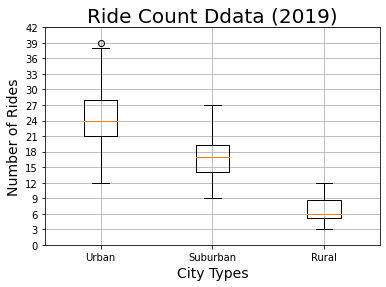

In [127]:
x_labels = ['Urban','Suburban','Rural']
rideCountData = [urbanRideCount,suburbRideCount,ruralRideCount]
fig,ax = plt.subplots()
ax.boxplot(rideCountData,labels=x_labels)
ax.set_title('Ride Count Ddata (2019)', fontsize = 20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types',fontsize = 14)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
plt.savefig('analysis/fig2.png')
plt.show()

In [114]:
urbanCityOutlier = urbanRideCount[urbanRideCount == 39].index[0]
print(f'{urbanCityOutlier} has the highest rider count')

West Angela has the highest rider count


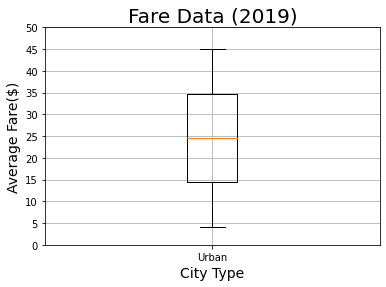

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [120]:
x_labels = ['Urban']
fareCountData = [urbanFares]
fig,ax = plt.subplots()
ax.boxplot(fareCountData, labels=x_labels)
ax.set_title('Fare Data (2019)', fontsize=20)
ax.set_ylabel('Average Fare($)', fontsize=14)
ax.set_xlabel('City Type',fontsize=14)
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urbanFares.describe()

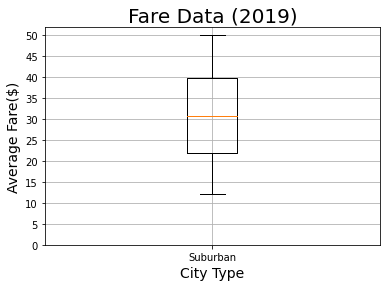

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [121]:
x_labels = ['Suburban']
fareCountData = [suburbFares]
fig,ax = plt.subplots()
ax.boxplot(fareCountData, labels=x_labels)
ax.set_title('Fare Data (2019)', fontsize=20)
ax.set_ylabel('Average Fare($)', fontsize=14)
ax.set_xlabel('City Type',fontsize=14)
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
suburbFares.describe()

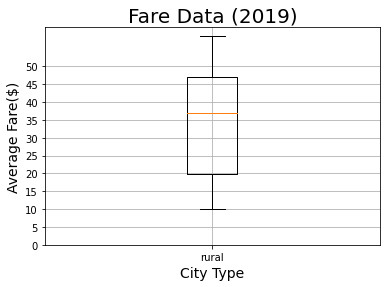

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [122]:
x_labels = ['rural']
fareCountData = [ruralFares]
fig,ax = plt.subplots()
ax.boxplot(fareCountData, labels=x_labels)
ax.set_title('Fare Data (2019)', fontsize=20)
ax.set_ylabel('Average Fare($)', fontsize=14)
ax.set_xlabel('City Type',fontsize=14)
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
ruralFares.describe()

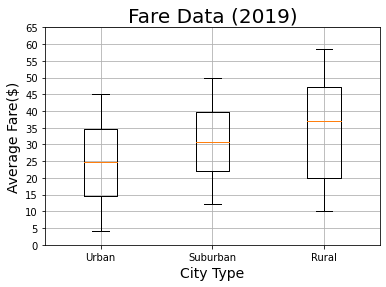

In [129]:
x_labels = ['Urban','Suburban','Rural']
fareCountData = [urbanFares,suburbFares,ruralFares]
fig,ax = plt.subplots()
ax.boxplot(fareCountData, labels=x_labels)
ax.set_title('Fare Data (2019)', fontsize=20)
ax.set_ylabel('Average Fare($)', fontsize=14)
ax.set_xlabel('City Type',fontsize=14)
ax.set_yticks(np.arange(0,70,step=5.0))
ax.grid()
plt.savefig('analysis/Fig3.png')
plt.show()
#print('Summary Statistics')
#urbanFares.describe(), suburbFares.describe(),ruralFares.describe()

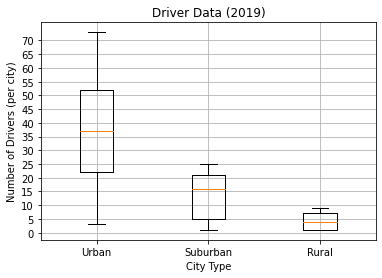

In [135]:
x_labels = ['Urban','Suburban','Rural']
driverData = [urbanDrivers,suburbDrivers,ruralDrivers]
fig,ax = plt.subplots()
ax.boxplot(driverData,labels=x_labels)
ax.set_title('Driver Data (2019)')
ax.set_ylabel('Number of Drivers (per city)')
ax.set_xlabel('City Type')
ax.set_yticks(np.arange(0,75,step=5.0))
ax.grid()
plt.savefig('analysis/Fig4.png')
plt.show()

In [151]:
sumFaresByType = pyBerDataComplete.groupby(['type']).sum()['fare']
sumFaresByType

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [155]:
totalFares = pyBerDataComplete['fare'].sum()
totalFares

63538.64

In [156]:
cityTypePct = 100 * (sumFaresByType / totalFares)
cityTypePct

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

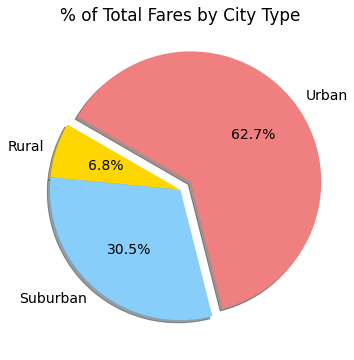

In [167]:
# Fares by City Type pie Chart
plt.subplots(figsize=(10,6))
plt.pie(cityTypePct, 
        labels=['Rural', 'Suburban','Urban'], 
        colors = ['gold','lightskyblue','lightcoral'],
        explode = [0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title('% of Total Fares by City Type')
mpl.rcParams['font.size']=14
plt.savefig('analysis/Fig5.png')
plt.show()

In [184]:
totalDrivers = pyBerDataComplete['driver_count'].sum()
totalDrivers

68709

In [185]:
totalCityTypeDrivers = pyBerDataComplete.groupby(['type']).sum()['driver_count']
totalCityTypeDrivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [186]:
cityTypeDriversPct = (totalCityTypeDrivers / totalDrivers) * 100
cityTypeDriversPct

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

In [188]:
driverPcts = 100* (pyBerDataComplete.groupby(['type']).sum()['driver_count'] / pyBerDataComplete['driver_count'].sum())
driverPcts



type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

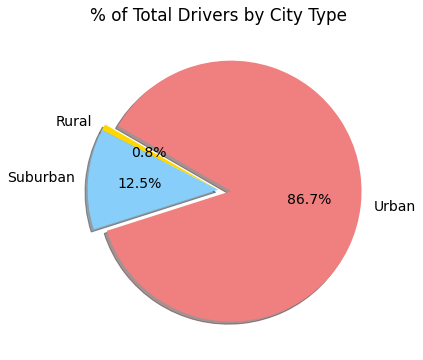

In [189]:
# Drivers by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(cityTypeDriversPct, 
        labels=['Rural', 'Suburban','Urban'], 
        colors = ['gold','lightskyblue','lightcoral'],
        explode = [0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title('% of Total Drivers by City Type')
mpl.rcParams['font.size']=14
plt.savefig('analysis/Fig7.png')
plt.show()

In [176]:
totalRides = pyBerDataComplete['ride_id'].count()
totalRides

2375

In [177]:
totalRidesCityType = pyBerDataComplete.groupby(['type']).count()['ride_id']
totalRidesCityType

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [181]:
ridesCityTypePct = (totalRidesCityType / totalRides) * 100
ridesCityTypePct

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

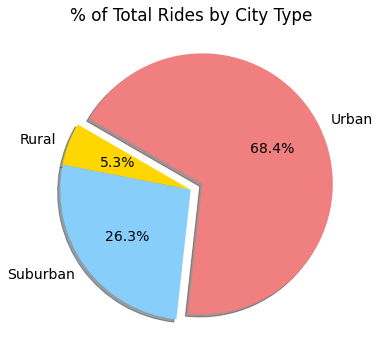

In [183]:
# Rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ridesCityTypePct, 
        labels=['Rural', 'Suburban','Urban'], 
        colors = ['gold','lightskyblue','lightcoral'],
        explode = [0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title('% of Total Rides by City Type')
mpl.rcParams['font.size']=14
plt.savefig('analysis/Fig6.png')
plt.show()